In [1]:
import pandas as pd
import numpy as np

top_num=10

df = pd.read_csv("train.shuf.csv")
df.target.astype(int)
dfs_info = pd.read_csv("songs.csv")
dfu_info = pd.read_csv("members.csv")

In [2]:
# Filter positive
dfp = df.loc[df.target > 0]

In [3]:
dfp.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
2,X6vanoAOzU4OLKuFYluZzk/IfpZenXD1axBSf4utasc=,4yVXed7DWnfbnxMkt1KytimqZPkZPDot/0foUHkDSnU=,my library,Local playlist more,local-library,1
6,by6TcS0ut/HIBtJ/FrZzUfPpfAL+54uy4cZQ9vFKgec=,IctY8S4J0DWDK35E2p9x24quIUtG6qbVzkx4x/SQKc4=,my library,Local playlist more,local-library,1
7,NR+Z/kYQyoFUIpts1U7BK7pib1RkkN9x03iwZp0xtvU=,Btqm9cMHqnL5yq7vVrH1YPVsRyiUN2TPQfBeRQ16au8=,search,Search,song,1
12,LoogaMWHdEXhrkcAeZObsW+diD6uTqlgQwNECX/4jfw=,0ee/D6HjX0jSytUn3v58C0x6zEzN4bcPq3WlqvrG/Xo=,discover,Online playlist more,online-playlist,1
14,L6fSf223p3T1nNoTYbE3ZDfCF940I+jVjlvb4lRvpiw=,vLvRGCAj8JzTLygSB20eqIL6hSTzE7gf4hyYAguZp0k=,my library,Local playlist more,local-library,1


In [4]:
dfs_info.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [5]:
dfs_info['artist_name'] = dfs_info['artist_name'].apply(lambda x: str(x).strip('|').split('|'))

In [6]:
dfs_info.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,[張信哲 (Jeff Chang)],董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,[BLACKPINK],TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,[SUPER JUNIOR],NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,[S.H.E],湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,[貴族精選],Traditional,Traditional,52.0


In [7]:
df_context = pd.merge(dfp, dfs_info, on='song_id', how='left')

In [8]:
df_context_explode = df_context.explode('artist_name')

In [9]:
artist_counts = df_context_explode['artist_name'].value_counts()

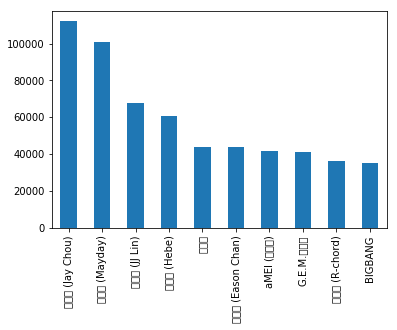

In [10]:
artist_counts[1:11].plot(kind='bar')

In [11]:
artist_counts[1:11].sum()

583876

In [13]:
myfilter = artist_counts[1:11].index
myfilter

Index(['周杰倫 (Jay Chou)', '五月天 (Mayday)', '林俊傑 (JJ Lin)', '田馥甄 (Hebe)', '玖壹壹',
       '陳奕迅 (Eason Chan)', 'aMEI (張惠妹)', 'G.E.M.鄧紫棋', '謝和弦 (R-chord)',
       'BIGBANG'],
      dtype='object')

In [14]:
dfs_info_explode = dfs_info.explode('artist_name')

In [15]:
dfs_info_filter = dfs_info_explode[ dfs_info_explode.artist_name.isin(myfilter) ]

In [16]:
dfs_info_filter.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
17,OcG4Ya7iXmVMCMy24C5wxDMtr9w6WQZiFaN0uq6zdTk=,169430,465,BIGBANG,TAEYANG| TEDDY,G-DRAGON| T.O.P| TEDDY,3.0
29,gG3/58uZyyOwaPT+eGWL81mwCzcDPW2EmwYcjWmvJSs=,226742,465,五月天 (Mayday),阿信,阿信,3.0
62,v91olyybN9ksMslVNo8ZdbOwj/gtBv4VzK35LEk0B/M=,253492,465,周杰倫 (Jay Chou),周杰倫,方文山,3.0
182,ou1wRtH/HtUshJxLUuNcJwRvN5X6nYuWAfZ6rdhGB8I=,166661,458,周杰倫 (Jay Chou),周杰倫,方文山,3.0


In [17]:
item = dfs_info_filter[ ['genre_ids', 'artist_name' ] ]

In [18]:
item.head()

,genre_ids,artist_name
8,465,林俊傑 (JJ Lin)
17,465,BIGBANG
29,465,五月天 (Mayday)
62,465,周杰倫 (Jay Chou)
182,458,周杰倫 (Jay Chou)


In [19]:
item['genre_ids'] = item['genre_ids'].apply( lambda x : str(x).split('|'))

/home/johncreed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
item = item.explode('genre_ids')

In [21]:
genre_gby = item.groupby('artist_name')['genre_ids'].apply(list)

In [22]:
item = genre_gby.reset_index()

In [23]:
def merge(mylist):
    return "|".join(mylist)

item['genre_ids'] = item['genre_ids'].apply(set)
item['genre_ids'] = item['genre_ids'].apply(merge)

In [24]:
item.to_csv("item.csv", index = False)

In [25]:
item.head()

,artist_name,genre_ids
0,BIGBANG,444|1259|465|2022
1,G.E.M.鄧紫棋,458|139|nan|1633|1568|465|359|430|1609|125|94|...
2,aMEI (張惠妹),458|465
3,五月天 (Mayday),nan|458|921|465
4,周杰倫 (Jay Chou),458|465|1605


In [26]:
item_label = item.reset_index()
item_label = item_label.rename(columns={'index': 'label'}).drop(columns=['genre_ids'])

In [27]:
item_label.head()

,label,artist_name
0,0,BIGBANG
1,1,G.E.M.鄧紫棋
2,2,aMEI (張惠妹)
3,3,五月天 (Mayday)
4,4,周杰倫 (Jay Chou)


In [28]:
df_context_filter = df_context_explode[ df_context_explode['artist_name'].isin(myfilter) ]
df_context_filter.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
4,L6fSf223p3T1nNoTYbE3ZDfCF940I+jVjlvb4lRvpiw=,vLvRGCAj8JzTLygSB20eqIL6hSTzE7gf4hyYAguZp0k=,my library,Local playlist more,local-library,1,256313.0,458,周杰倫 (Jay Chou),周杰倫,方文山,3.0
5,5jBBvtOAvwqzxL0fNfnVnCcHEB0bDdXWpT5NB8sOQHc=,RxCEvZAXgnh1ZDlQBuVb/J9xpnopFSJBaBxLqGZIXSs=,my library,Local playlist more,local-playlist,1,297482.0,458,周杰倫 (Jay Chou),周杰倫,方文山,3.0
10,BgWbzaxryLGgIz7LF4Lg2Yr7RdxAkx8U0orM3R9nI+c=,IomyG8OwXU9lWvede4KdHxtUZ+eppEdusnOCDDok36g=,my library,Local playlist more,local-library,1,289436.0,458,周杰倫 (Jay Chou),周杰倫,周杰倫,3.0
15,qcLRKxYi5FBPD48PJ+JrP6iZIfOT3cmt2J73yzdq1gM=,CTwL9Gnx6QsaZ6+ygo/VHirN/XZKxlUJEB2VGQX8yjg=,my library,NaN,top-hits-for-artist,1,223399.0,458,周杰倫 (Jay Chou),周杰倫,周杰倫,3.0
25,jylgNIKqHlPbX7bkaAqRPtNRQQ5cvnkd9JV7porZ1Ig=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,search,Artist more,top-hits-for-artist,1,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0


In [29]:
df_context_filter = pd.merge(df_context_filter, item_label, on='artist_name', how='left')
df_context_filter.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,label
0,L6fSf223p3T1nNoTYbE3ZDfCF940I+jVjlvb4lRvpiw=,vLvRGCAj8JzTLygSB20eqIL6hSTzE7gf4hyYAguZp0k=,my library,Local playlist more,local-library,1,256313.0,458,周杰倫 (Jay Chou),周杰倫,方文山,3.0,4
1,5jBBvtOAvwqzxL0fNfnVnCcHEB0bDdXWpT5NB8sOQHc=,RxCEvZAXgnh1ZDlQBuVb/J9xpnopFSJBaBxLqGZIXSs=,my library,Local playlist more,local-playlist,1,297482.0,458,周杰倫 (Jay Chou),周杰倫,方文山,3.0,4
2,BgWbzaxryLGgIz7LF4Lg2Yr7RdxAkx8U0orM3R9nI+c=,IomyG8OwXU9lWvede4KdHxtUZ+eppEdusnOCDDok36g=,my library,Local playlist more,local-library,1,289436.0,458,周杰倫 (Jay Chou),周杰倫,周杰倫,3.0,4
3,qcLRKxYi5FBPD48PJ+JrP6iZIfOT3cmt2J73yzdq1gM=,CTwL9Gnx6QsaZ6+ygo/VHirN/XZKxlUJEB2VGQX8yjg=,my library,NaN,top-hits-for-artist,1,223399.0,458,周杰倫 (Jay Chou),周杰倫,周杰倫,3.0,4
4,jylgNIKqHlPbX7bkaAqRPtNRQQ5cvnkd9JV7porZ1Ig=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,search,Artist more,top-hits-for-artist,1,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,5


In [30]:
context = df_context_filter.drop(columns=['artist_name', 'composer', 'song_length', 'genre_ids', 'language', 'lyricist', 'target'])
context.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,label
0,L6fSf223p3T1nNoTYbE3ZDfCF940I+jVjlvb4lRvpiw=,vLvRGCAj8JzTLygSB20eqIL6hSTzE7gf4hyYAguZp0k=,my library,Local playlist more,local-library,4
1,5jBBvtOAvwqzxL0fNfnVnCcHEB0bDdXWpT5NB8sOQHc=,RxCEvZAXgnh1ZDlQBuVb/J9xpnopFSJBaBxLqGZIXSs=,my library,Local playlist more,local-playlist,4
2,BgWbzaxryLGgIz7LF4Lg2Yr7RdxAkx8U0orM3R9nI+c=,IomyG8OwXU9lWvede4KdHxtUZ+eppEdusnOCDDok36g=,my library,Local playlist more,local-library,4
3,qcLRKxYi5FBPD48PJ+JrP6iZIfOT3cmt2J73yzdq1gM=,CTwL9Gnx6QsaZ6+ygo/VHirN/XZKxlUJEB2VGQX8yjg=,my library,NaN,top-hits-for-artist,4
4,jylgNIKqHlPbX7bkaAqRPtNRQQ5cvnkd9JV7porZ1Ig=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,search,Artist more,top-hits-for-artist,5


In [31]:
dset = {}
context['his'] = np.nan
context['his'] = context.his.apply(str)
for i, row in context.iterrows():
    user_id = row['msno']
    song_id = str(row['song_id'])
    if user_id in dset:
        context.set_value(i, 'his', '|'.join(dset[user_id][-50:]))
        dset[user_id].append(song_id)
    else:
        dset[user_id] = [song_id]
    if i % 100000 == 0:
        print(i)

0


/home/johncreed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


100000
200000
300000
400000
500000


In [32]:
context.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,label,his
583871,XFodjo5sqmKyqu46KIczn1wFYTmMFR52DFkRGmlv6gI=,n+pMhj/jpCnpiUcSDl4k3i9FJODDddEXmpE48/HczTI=,my library,Local playlist more,local-playlist,5,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=|U...
583872,qZLnpuq8fSp+GJ5YODWpNDKkAAOxzl+QIwTZdJhWqLg=,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,my library,Local playlist more,local-library,7,0GJzCi54j7M1GdSxmtfKaI8R+2Jq3iqlKt5qJIvtEsc=|1...
583873,45rm9KkPuVt1izcfUQxUzK04m91baCgjO5PTqZT8Dt0=,xeyouM+hIjUtImV20of0p7SrDY4UnejP5Q/BnCHYG00=,discover,Online playlist more,online-playlist,5,zkYoYxzmRNh0k2voTIO/MqK1TKgHXaWX54bAEHUqMHI=|e...
583874,K5x68e9t0PySwLAoeGtB5NKXTPpZlNoAdNcdSHx4qLg=,ea3isZric6J6Q3IkdhFV+dwy3Jf+N41fXRIGoboUS0E=,my library,Local playlist more,local-library,4,HsgJXv1C7iVZiP7CWwWTfsmMhia6Huc0MUccfj+D02o=|V...
583875,jrNT3NfoP4KBD6MjdEujl85tqW/2SYtRPc9A1ootqSM=,Gbi9NN1mv2Mr1AePsacdXZYWiH9nJgJjW/L2TjKLuxg=,my library,Local playlist more,local-library,4,zg6SzD3aqsnOqqyhFYTdbCNFrhSACbwefB/ZFi68AO0=|p...


In [33]:
context = pd.merge(context, dfu_info, on='msno', how='left')
context.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,label,his,city,bd,gender,registered_via,registration_init_time,expiration_date
0,L6fSf223p3T1nNoTYbE3ZDfCF940I+jVjlvb4lRvpiw=,vLvRGCAj8JzTLygSB20eqIL6hSTzE7gf4hyYAguZp0k=,my library,Local playlist more,local-library,4,nan,5,38,male,9,20101029,20170903
1,5jBBvtOAvwqzxL0fNfnVnCcHEB0bDdXWpT5NB8sOQHc=,RxCEvZAXgnh1ZDlQBuVb/J9xpnopFSJBaBxLqGZIXSs=,my library,Local playlist more,local-playlist,4,nan,1,0,NaN,13,20161227,20170926
2,BgWbzaxryLGgIz7LF4Lg2Yr7RdxAkx8U0orM3R9nI+c=,IomyG8OwXU9lWvede4KdHxtUZ+eppEdusnOCDDok36g=,my library,Local playlist more,local-library,4,nan,10,0,NaN,4,20160117,20170927
3,qcLRKxYi5FBPD48PJ+JrP6iZIfOT3cmt2J73yzdq1gM=,CTwL9Gnx6QsaZ6+ygo/VHirN/XZKxlUJEB2VGQX8yjg=,my library,NaN,top-hits-for-artist,4,nan,6,28,male,3,20131227,20170926
4,jylgNIKqHlPbX7bkaAqRPtNRQQ5cvnkd9JV7porZ1Ig=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,search,Artist more,top-hits-for-artist,5,nan,15,21,male,9,20140502,20171003


In [34]:
context = context.drop(columns=['registered_via', 'registration_init_time', 'expiration_date', 'bd'])
context.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,label,his,city,gender
0,L6fSf223p3T1nNoTYbE3ZDfCF940I+jVjlvb4lRvpiw=,vLvRGCAj8JzTLygSB20eqIL6hSTzE7gf4hyYAguZp0k=,my library,Local playlist more,local-library,4,nan,5,male
1,5jBBvtOAvwqzxL0fNfnVnCcHEB0bDdXWpT5NB8sOQHc=,RxCEvZAXgnh1ZDlQBuVb/J9xpnopFSJBaBxLqGZIXSs=,my library,Local playlist more,local-playlist,4,nan,1,NaN
2,BgWbzaxryLGgIz7LF4Lg2Yr7RdxAkx8U0orM3R9nI+c=,IomyG8OwXU9lWvede4KdHxtUZ+eppEdusnOCDDok36g=,my library,Local playlist more,local-library,4,nan,10,NaN
3,qcLRKxYi5FBPD48PJ+JrP6iZIfOT3cmt2J73yzdq1gM=,CTwL9Gnx6QsaZ6+ygo/VHirN/XZKxlUJEB2VGQX8yjg=,my library,NaN,top-hits-for-artist,4,nan,6,male
4,jylgNIKqHlPbX7bkaAqRPtNRQQ5cvnkd9JV7porZ1Ig=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,search,Artist more,top-hits-for-artist,5,nan,15,male


In [35]:
context.to_csv("context.csv", index = False)